**Цель исследования**

В данном проекте проводится исследование данных сервиса аренды самокатов. 

Данные представлены информацией о: 
- пользователях - имя, возраст, город, тип подписки 
- поездках - дистанция, продолжительность, дата
- подписках - стоимость минуты поездки, стоимость начала поездки, месячная стоимость подписки.

Цель - проверить гипотезы продакт-менеджеров для увеличения клиентов с подпиской и проведения соответствующих акций.

План исследований:
- предобработка данных
- исследовательский анализ данных
- подсчет выручки от клиентов с подпиской и без
- проверка гипотез продакт-менеджеров
- выполнение расчетов для отдела маркетинга
- сформировать вывод по результатам работы

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

## Шаг 1. Загрузка данных

**Прочитаем файлы и создадим датафреймы**

In [2]:
try:
    users = pd.read_csv('/datasets/users_go.csv', sep=',')
except:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv', sep=',')

In [3]:
try:
    rides = pd.read_csv('/datasets/rides_go.csv', sep=',')
except:
    rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv', sep=',')

In [4]:
try:
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv', sep=',')
except:
    subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv', sep=',')

**Выведем информацию по каждому датафрейму**

In [5]:
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [7]:
round(rides.head(10), 2)

,user_id,distance,duration,date
0,1,4409.92,25.60,2021-01-01
1,1,2617.59,15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,2694.78,18.51,2021-08-11
4,1,4028.69,26.27,2021-08-28
5,1,2770.89,16.65,2021-10-09
6,1,3039.02,14.93,2021-10-19
7,1,2842.12,23.12,2021-11-06
8,1,3412.69,15.24,2021-11-14
9,1,748.69,15.04,2021-11-22


In [8]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [9]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В датафреймах представлена информация о 1565 клиентах сервиса аренды самокатов. Самый большой датафрейм с данными о поездках содержит 18068 записей. В данных о подписках представлено два тарифа. Пропущенных данных в таблицах нет. В датафрейме с информацией о поездках дата хранится в строчном формате, потребуется поменять на формат даты.

## Шаг 2. Предобработка данных

**Проверим корректность названий столбцов**

In [11]:
users.columns

Index(['user_id', 'name', 'age', 'city', 'subscription_type'], dtype='object')

In [12]:
rides.columns

Index(['user_id', 'distance', 'duration', 'date'], dtype='object')

In [13]:
subscriptions.columns

Index(['subscription_type', 'minute_price', 'start_ride_price',
       'subscription_fee'],
      dtype='object')

Корректировать названия столбцов необходимости нет.

**Приведем столбец `date` в `rides` к типу даты**

In [14]:
rides['date'] = pd.to_datetime(
    rides['date'], format='%Y-%m-%d'
)

In [15]:
rides.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

**Создадим новый столбец с номером месяца на основе столбца `date`**

In [16]:
rides['month'] = rides['date'].dt.month

In [17]:
round(rides.head(), 2)

,user_id,distance,duration,date,month
0,1,4409.92,25.60,2021-01-01,1
1,1,2617.59,15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4
3,1,2694.78,18.51,2021-08-11,8
4,1,4028.69,26.27,2021-08-28,8


Проверим в каком диапазоне находятся даты. Выведем минимальное и максимальное значения.

In [18]:
rides['date'].min()

Timestamp('2021-01-01 00:00:00')

In [19]:
rides['date'].max()

Timestamp('2021-12-30 00:00:00')

Все даты находятся в пределах одного года, таким образом все значения столбца месяц также относятся к одному году.

**Проверим наличие пропущенных значений и дубликатов в датафреймах**

In [20]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [21]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [22]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропущенных значений не обнаружено.

In [23]:
users.duplicated().sum()

31

In [24]:
rides.duplicated().sum()

0

In [25]:
subscriptions.duplicated().sum()

0

Обнаружены дубликаты в датафрейме `users` в количестве 31. Удалим их из датафрейма.

In [26]:
users.drop_duplicates(inplace=True)

In [27]:
users.duplicated().sum()

0

## Шаг 3. Исследовательский анализ данных

### Частота встречаемости городов

In [28]:
city_pivot_table = users.pivot_table(index='city', values='name', aggfunc='count')

In [29]:
city_pivot_table['Процент'] = round(city_pivot_table['name'] / city_pivot_table['name'].sum(), 3)*100

In [30]:
city_pivot_table = city_pivot_table.rename(columns={'name': 'Кол-во клиентов'})
city_pivot_table = city_pivot_table.rename_axis('Город')

In [31]:
city_pivot_table = city_pivot_table.sort_values(by='Кол-во клиентов', ascending=False)

In [32]:
city_pivot_table

,Кол-во клиентов,Процент
Город,,
Пятигорск,219,14.3
Екатеринбург,204,13.3
Ростов-на-Дону,198,12.9
Краснодар,193,12.6
Сочи,189,12.3
Омск,183,11.9
Тюмень,180,11.7
Москва,168,11.0


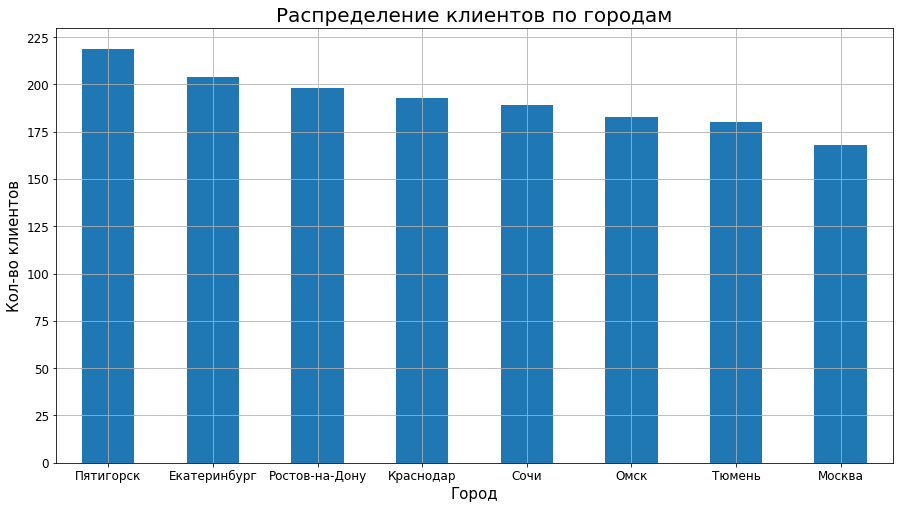

In [33]:
city_pivot_table['Кол-во клиентов'].plot(kind='bar', figsize=(15, 8), rot=0)
plt.title('Распределение клиентов по городам', fontsize=20)
plt.grid(True)
plt.yticks(range(0, 250, 25))
plt.ylabel('Кол-во клиентов', fontsize=15)
plt.xlabel('Город', fontsize=15)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12);

Больше всего клентов у сервиса в городе Пятигорск - 219, на втором месте город Екатеринбург - 204 клиента. В остальных городах количество менее 200. Меньше всего клиентов в Москве - 168.

### Соотношение пользователей с подпиской и без подписки

In [34]:
sub_pivot_table = users.pivot_table(index='subscription_type', values='name', aggfunc='count')

In [35]:
sub_pivot_table['Процент'] = round(sub_pivot_table['name'] / sub_pivot_table['name'].sum(), 2)*100

In [36]:
sub_pivot_table = sub_pivot_table.rename(columns={'name': 'Кол-во клиентов'})
sub_pivot_table = sub_pivot_table.rename_axis('Тип подписки')

In [37]:
sub_pivot_table

,Кол-во клиентов,Процент
Тип подписки,,
free,835,54.0
ultra,699,46.0


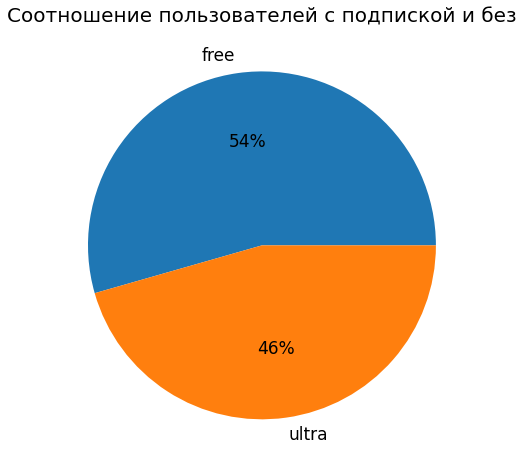

In [38]:
sub_pivot_table['Кол-во клиентов'].plot(
    kind='pie', figsize=(8, 8), subplots=True, autopct='%1.0f%%', textprops={'fontsize': 17}
)
plt.title('Соотношение пользователей с подпиской и без', fontsize=20)
plt.rcParams['font.size'] = 15.0
plt.ylabel('');

54% клиентов пользуются сервисом без подписки, 46% - с подпиской.

### Возраст пользователей

In [39]:
age_pivot_table = users.pivot_table(index='age', values='name', aggfunc='count')

In [40]:
age_pivot_table = age_pivot_table.rename(columns={'name': 'quantity'})

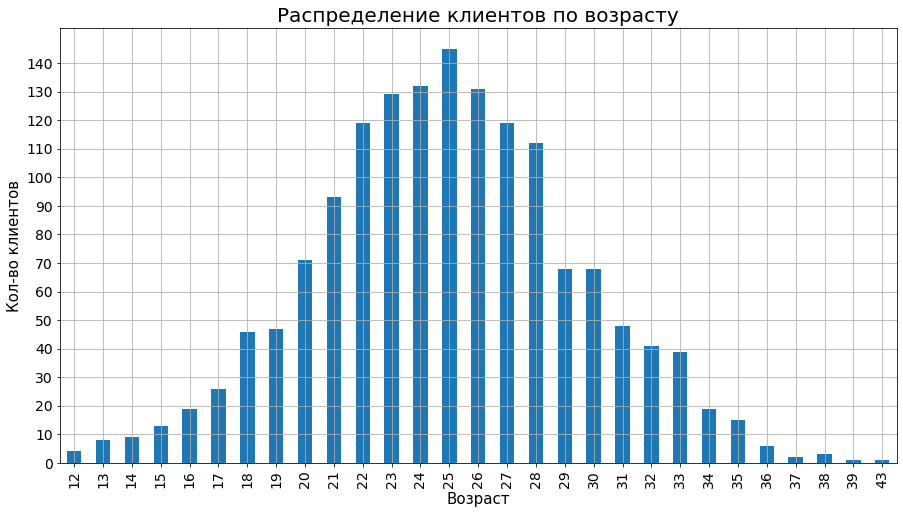

In [41]:
age_pivot_table.plot(kind='bar', figsize=(15, 8), legend=False)
plt.grid(True)
plt.title('Распределение клиентов по возрасту', fontsize=20)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.ylabel('Кол-во клиентов', fontsize=15)
plt.xlabel('Возраст', fontsize=15)
plt.yticks(range(0, 150, 10));

In [42]:
round(users['age'].describe(), 1)

count    1534.0
mean       24.9
std         4.6
min        12.0
25%        22.0
50%        25.0
75%        28.0
max        43.0
Name: age, dtype: float64

Возраст клиентов сервиса от 12 до 43 лет. 50% пользователей в возрасте от 22 до 28 лет. Больше всего пользователей в возрасте 25 лет.

### Расстояние, которое пользователь преодолел за одну поездку

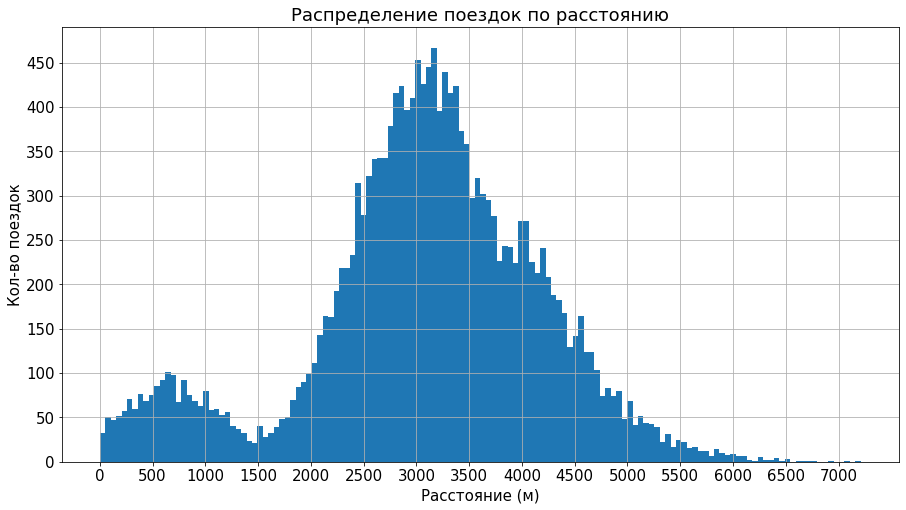

In [43]:
rides['distance'].hist(bins=140, figsize=(15, 8))
plt.title('Распределение поездок по расстоянию')
plt.xlabel('Расстояние (м)', fontsize=15)
plt.ylabel('Кол-во поездок', fontsize=15)
plt.grid(True)
plt.yticks(range(0, 500, 50))
plt.xticks(range(0, 7500, 500));

In [44]:
round(rides['distance'].describe())

count    18068.0
mean      3071.0
std       1117.0
min          1.0
25%       2543.0
50%       3134.0
75%       3776.0
max       7211.0
Name: distance, dtype: float64

In [45]:
(
    rides[['distance',]]
    .quantile([0.0012, 0.01, .5, .99, .9988]) 
    .style.format("{:,.2f}")
)

,distance
0.0012,36.38
0.01,208.08
0.5,"3,133.61"
0.99,"5,478.62"
0.9988,"6,251.50"


Данные о дальности поездок представлены значениями от 1 до 7211. Среднее значение - 3071, медиана - 3134. 50% поездок находятся в диапазоне от 2543 до 3776. Поездки менее 200 м и более 5500 крайне редки. Присутствует локальный максимум около значения 700 м, возможно это поездки до ближайшей остановки общественного транспорта от дома и обратно.

### Продолжительность поездок

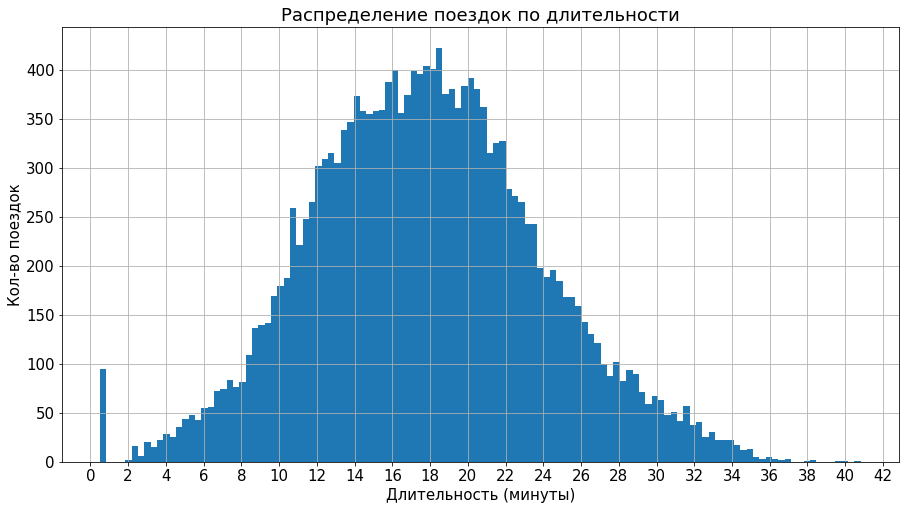

In [46]:
rides['duration'].hist(bins=120, figsize=(15, 8))
plt.title('Распределение поездок по длительности')
plt.xlabel('Длительность (минуты)', fontsize=15)
plt.ylabel('Кол-во поездок', fontsize=15)
plt.grid(True)
plt.xticks(range(0, 44, 2));

In [47]:
round(rides['duration'].describe(), 1)

count    18068.0
mean        17.8
std          6.1
min          0.5
25%         13.6
50%         17.7
75%         21.7
max         40.8
Name: duration, dtype: float64

In [48]:
(
    rides[['duration',]]
    .quantile([0.0012, 0.01, .5, .99, .9988]) 
    .style.format("{:,.2f}")
)

,duration
0.0012,0.50
0.01,3.98
0.5,17.68
0.99,32.50
0.9988,35.43


Длительность поездок лежит в диапазоне от 0.5 до 40.8 минут. Присутствует значение 0.5.

50% данных находятся в диапазоне от 13.7 до 21.7 минут. Среднее значение и медиана находятся около 18 минут.
Значения менее 4 и более 33 минут встречаются редко.

In [49]:
rides.query('duration < 2')['distance'].count()

95

In [50]:
sorted(rides.query('duration < 2')['distance'].unique())

[4030.308008428866,
 4103.998873945571,
 4106.278268490103,
 4169.066800329714,
 4177.139335778978,
 4178.876257756492,
 4196.445200706328,
 4204.302074139819,
 4247.502137403129,
 4324.48243864755,
 4375.042407511912,
 4406.95481174576,
 4430.51076797022,
 4434.740681133375,
 4445.481069809114,
 4452.491518375624,
 4520.123806596047,
 4533.964590826548,
 4539.088309585886,
 4544.668988942118,
 4578.711073452204,
 4593.389021928714,
 4599.798655561068,
 4602.122400778389,
 4620.899239324063,
 4633.256106235665,
 4684.004396727481,
 4688.979944600036,
 4697.638429990268,
 4703.905427252714,
 4704.878191531725,
 4718.820995798903,
 4753.927777781776,
 4762.120492992623,
 4770.172208171858,
 4807.103751282805,
 4830.824371154857,
 4835.931553283828,
 4848.485014335245,
 4857.412919857679,
 4881.391865205429,
 4899.706877327956,
 4907.14075094942,
 4935.07104540572,
 4958.922076969682,
 5035.1041144936935,
 5052.410424837328,
 5052.769410992954,
 5059.187374936329,
 5071.5772479299,
 5095.

Поездки с длительностью 0.5 были совершены на большую дальность от 4000 до 7200 м. Это говорит о наличие какого то программного сбоя и разработчикам стоит обратить на это внимание. Компания теряет деньги на длительных поездках.

Удалим эти данные т.к. они составляют 0,5% выборки.

In [51]:
index_drop_duration = rides.query('duration < 2').index

In [52]:
rides.drop(index_drop_duration, inplace=True)

Распределение после удаления данных

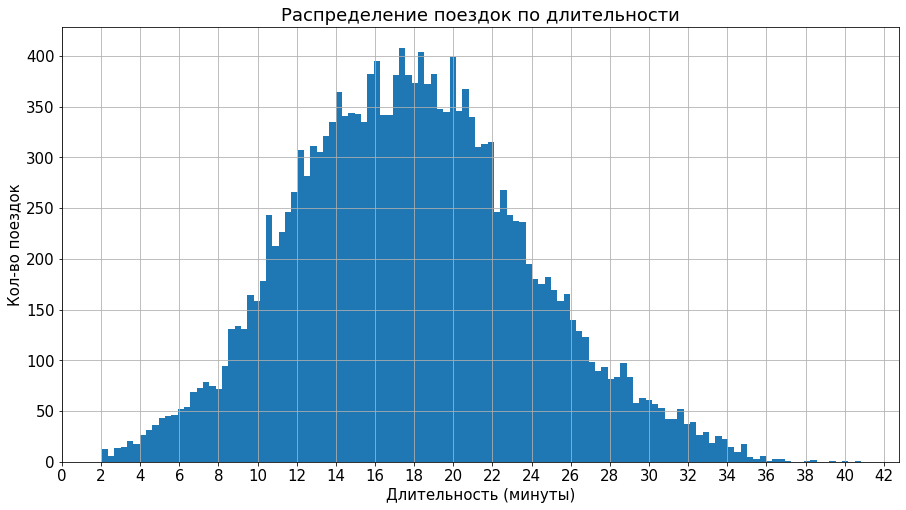

In [53]:
rides['duration'].hist(bins=120, figsize=(15, 8))
plt.title('Распределение поездок по длительности')
plt.xlabel('Длительность (минуты)', fontsize=15)
plt.ylabel('Кол-во поездок', fontsize=15)
plt.grid(True)
plt.xticks(range(0, 44, 2));

In [54]:
round(rides['duration'].describe(), 1)

count    17973.0
mean        17.9
std          6.0
min          2.0
25%         13.7
50%         17.7
75%         21.7
max         40.8
Name: duration, dtype: float64

## Шаг 4. Объединение данных

### Объединие данные о пользователях, поездках и подписках в один датафрейм

In [55]:
data = users.copy()

In [56]:
data = data.merge(rides, on='user_id')

In [57]:
data.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11


In [58]:
data.shape

(17973, 9)

In [59]:
rides.shape

(17973, 5)

In [60]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
dtype: int64

In [61]:
data.duplicated().sum()

0

Количество строк в объеденном датафрейме соответствует максимальному из объединемых. Дубликатов и нулевых значений не обнаружено. Следовательно таблицы объеденены корректно.

In [62]:
data = data.merge(subscriptions, on='subscription_type')

In [63]:
round(data.head(10), 2)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.89,16.65,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.02,14.93,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.12,23.12,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.69,15.24,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.69,15.04,2021-11-22,11,6,0,199


In [64]:
data.shape

(17973, 12)

In [65]:
data.duplicated().sum()

0

In [66]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Количество строк в объеденном датафрейме соответствует максимальному из объединемых. Дубликатов и нулевых значений не обнаружено. Следовательно таблицы объеденены корректно.

### Создание датафреймов из датафрейма, созданного на этапе 4.1

**Создание датафрейма c данными о пользователях без подписки**

In [67]:
data_free = data.query('subscription_type == "free"')

In [68]:
data_free.shape

(11473, 12)

In [69]:
round(data_free.head(), 2)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,14.94,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,16.23,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,20.02,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,9.78,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,17.43,2021-02-14,2,8,50,0


**Создание датафрейма c данными о пользователях с подпиской**

In [70]:
data_ultra = data.query('subscription_type == "ultra"')

In [71]:
data_ultra.shape

(6500, 12)

In [72]:
round(data_ultra.head(), 2)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,8,6,0,199


**Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий**

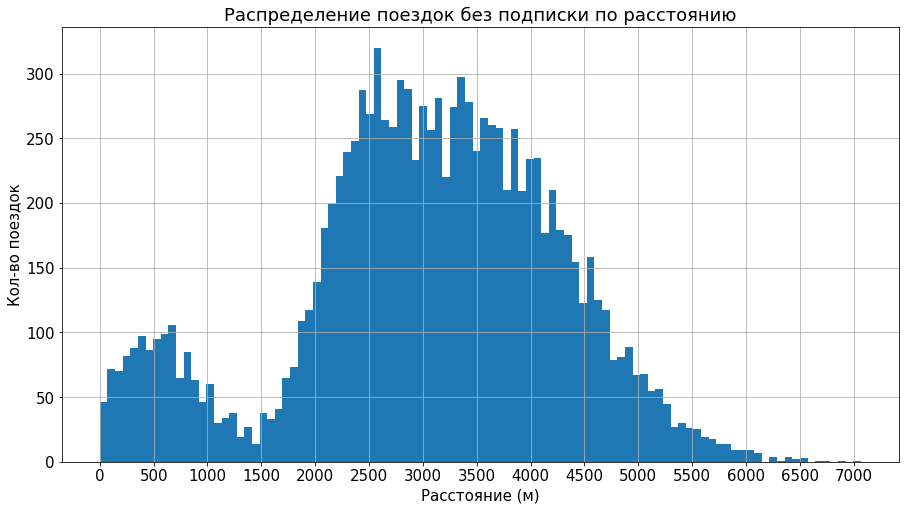

In [73]:
data_free['distance'].hist(bins=100, figsize=(15, 8))
plt.title('Распределение поездок без подписки по расстоянию')
plt.xlabel('Расстояние (м)', fontsize=15)
plt.ylabel('Кол-во поездок', fontsize=15)
plt.grid(True)
plt.yticks(range(0, 350, 50))
plt.xticks(range(0, 7500, 500));

In [74]:
round(data_free['distance'].describe())

count    11473.0
mean      3028.0
std       1236.0
min          1.0
25%       2361.0
50%       3102.0
75%       3884.0
max       7066.0
Name: distance, dtype: float64

Распределение поездок по дистанции схоже с распределением всех поездок. Пик смещен ближе к значению 2500 м. Также присутствует локальный пик около 700 м.

Среднее значение - 3028, медиана - 3102.
50% поездок находятся в диапазоне от 2361 до 3884 м.

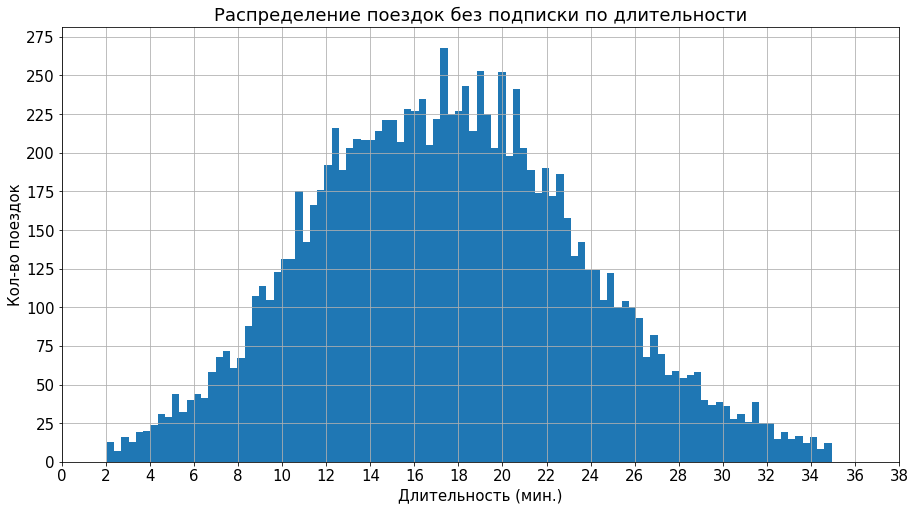

In [75]:
data_free['duration'].hist(bins=100, figsize=(15, 8))
plt.title('Распределение поездок без подписки по длительности')
plt.xlabel('Длительность (мин.)', fontsize=15)
plt.ylabel('Кол-во поездок', fontsize=15)
plt.grid(True)
plt.yticks(range(0, 300, 25))
plt.xticks(range(0, 40, 2));

In [76]:
round(data_free['duration'].describe(), 1)

count    11473.0
mean        17.5
std          6.2
min          2.0
25%         13.1
50%         17.4
75%         21.6
max         34.9
Name: duration, dtype: float64

Распределение поездок клиентов без подписки по длительности схоже с распределением поездок по длительности всех клиентов.

Среднее значение - 17.5 мин., медиана - 17.4 мин.
50% поездок по длительности находятся в диапазоне от 13.1 до 21.6 мин.

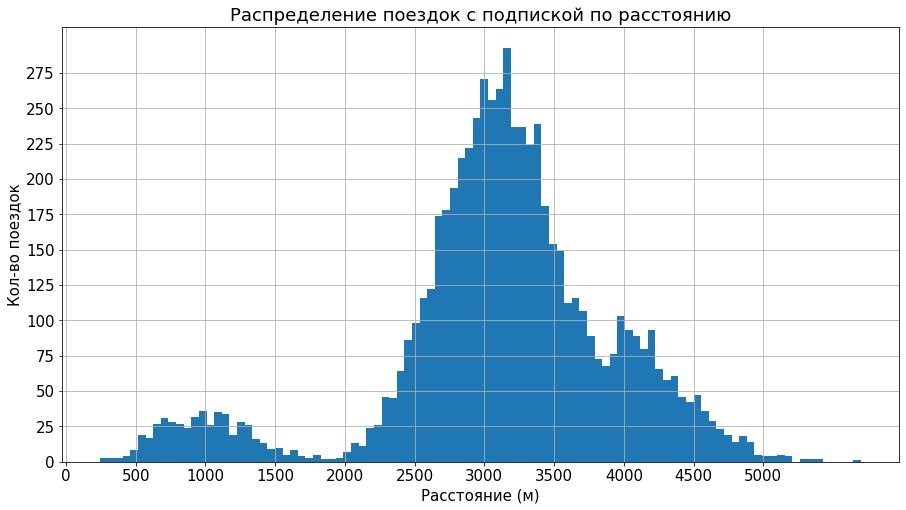

In [77]:
data_ultra['distance'].hist(bins=100, figsize=(15, 8))
plt.title('Распределение поездок с подпиской по расстоянию')
plt.xlabel('Расстояние (м)', fontsize=15)
plt.ylabel('Кол-во поездок', fontsize=15)
plt.grid(True)
plt.yticks(range(0, 300, 25))
plt.xticks(range(0, 5500, 500));

In [78]:
round(data_ultra['distance'].describe())

count    6500.0
mean     3115.0
std       837.0
min       244.0
25%      2785.0
50%      3149.0
75%      3561.0
max      5700.0
Name: distance, dtype: float64

Поездки с подпиской по расстоянию распределены с меньшим стандартным отклонением по сравнению с поездками без подписки - 837 против 1236. Данные более плотно сгруппированы около 3000 м с пиком около 3200 м. Один локальный пик смещен ближе к 1000 м, также присутствует локальный пик около 4000 м.

Среднее значение - 3115 м., медиана - 3149 м.
50% поездок находятся в диапазоне от 2785 до 3561 м.

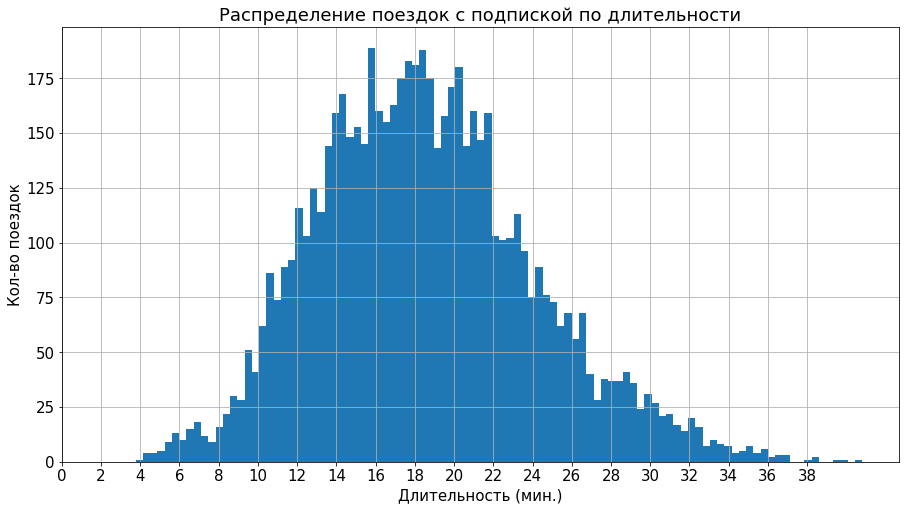

In [79]:
data_ultra['duration'].hist(bins=100, figsize=(15, 8))
plt.title('Распределение поездок с подпиской по длительности')
plt.xlabel('Длительность (мин.)', fontsize=15)
plt.ylabel('Кол-во поездок', fontsize=15)
plt.grid(True)
plt.yticks(range(0, 200, 25))
plt.xticks(range(0, 40, 2));

In [80]:
round(data_ultra['duration'].describe(), 1)

count    6500.0
mean       18.5
std         5.6
min         3.8
25%        14.5
50%        18.2
75%        21.9
max        40.8
Name: duration, dtype: float64

Распределение поездок без подписки по длительности схоже с распределением поездок без подписки.

Среднее значение - 18.5, медиана - 18.2 мин.
50% поездок по длительности находятся в диапазоне от 14.5 до 21.9 мин.

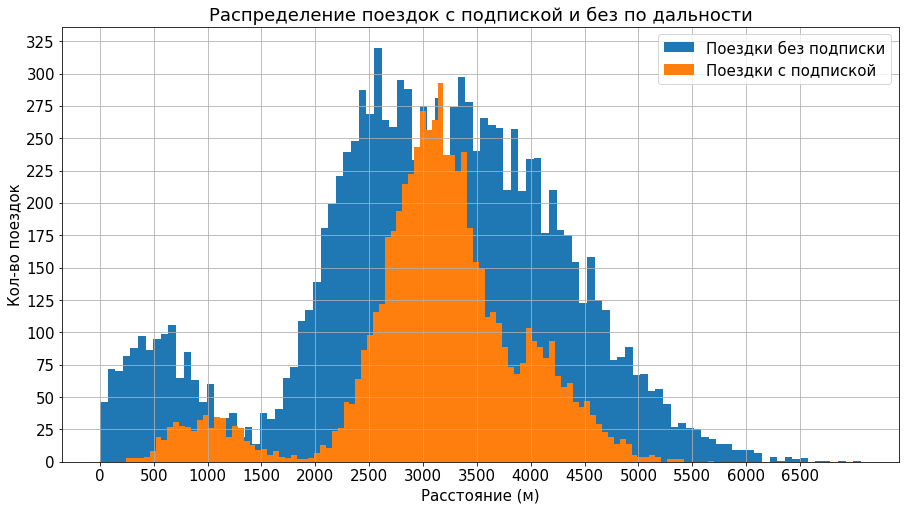

In [81]:
data_free['distance'].hist(bins=100, figsize=(15, 8))
data_ultra['distance'].hist(bins=100, figsize=(15, 8))
plt.title('Распределение поездок с подпиской и без по дальности')
plt.xlabel('Расстояние (м)', fontsize=15)
plt.ylabel('Кол-во поездок', fontsize=15)
plt.legend(['Поездки без подписки', 'Поездки с подпиской'])
plt.grid(True)
plt.yticks(range(0, 350, 25))
plt.xticks(range(0, 7000, 500));

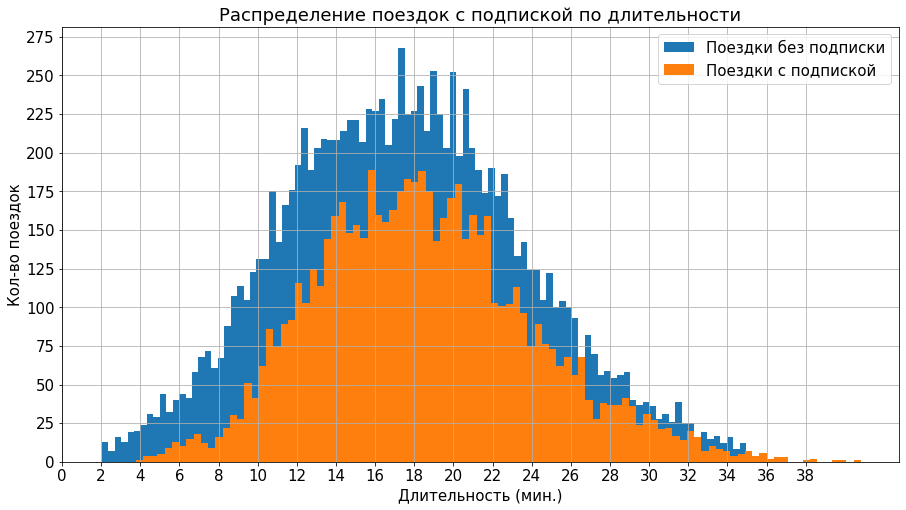

In [82]:
data_free['duration'].hist(bins=100, figsize=(15, 8))
data_ultra['duration'].hist(bins=100, figsize=(15, 8))
plt.title('Распределение поездок с подпиской по длительности')
plt.xlabel('Длительность (мин.)', fontsize=15)
plt.ylabel('Кол-во поездок', fontsize=15)
plt.grid(True)
plt.yticks(range(0, 300, 25))
plt.xticks(range(0, 40, 2))
plt.legend(['Поездки без подписки', 'Поездки с подпиской']);

## Шаг 5. Подсчёт выручки

### Создайте датафрейм с агрегированными данными о поездках 

In [83]:
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [84]:
agg_data = data.groupby(['user_id', 'month']).agg(
    total_distance=('distance', 'sum'), total_rides=('distance', 'count'), total_duration=('duration', 'sum')
)

In [85]:
round(agg_data.head(10), 1)

total_distance  total_rides  total_duration
user_id month                                             
1       1              7027.5            2            41.4
        4               754.2            1             6.2
        8              6723.5            2            44.8
        10             5809.9            2            31.6
        11             7003.5            3            53.4
        12             6751.6            2            27.2
2       3             10187.7            3            61.0
        4              6164.4            2            39.0
        6              3255.3            1            13.9
        7              6780.7            2            46.2

In [86]:
agg_data.isna().sum()

total_distance    0
total_rides       0
total_duration    0
dtype: int64

Пропусков в таблице не обнаружено.

### Добавление столбца с помесячной выручкой, которую принёс каждый пользователь

Функция, которая расчитывает доход с каждого клиента за месяц

In [87]:
def calculate_income(user_id, month):
    income_data = data.query('user_id == @user_id and month == @month')
    total_duration = np.ceil(income_data['duration']).sum()
    income = total_duration * income_data['minute_price'].iloc[0] + \
    income_data['duration'].count() * income_data['start_ride_price'].iloc[0] + \
    income_data['subscription_fee'].iloc[0]
    return income

Создадим новый столбец и расчитаем значения с помощью функции

In [88]:
agg_data['income'] = agg_data.apply(
    lambda row: calculate_income(row.name[0], row.name[1]), axis=1
)

In [89]:
round(agg_data.head(10), 1)

total_distance  total_rides  total_duration  income
user_id month                                                     
1       1              7027.5            2            41.4   451.0
        4               754.2            1             6.2   241.0
        8              6723.5            2            44.8   475.0
        10             5809.9            2            31.6   391.0
        11             7003.5            3            53.4   535.0
        12             6751.6            2            27.2   367.0
2       3             10187.7            3            61.0   577.0
        4              6164.4            2            39.0   439.0
        6              3255.3            1            13.9   283.0
        7              6780.7            2            46.2   487.0

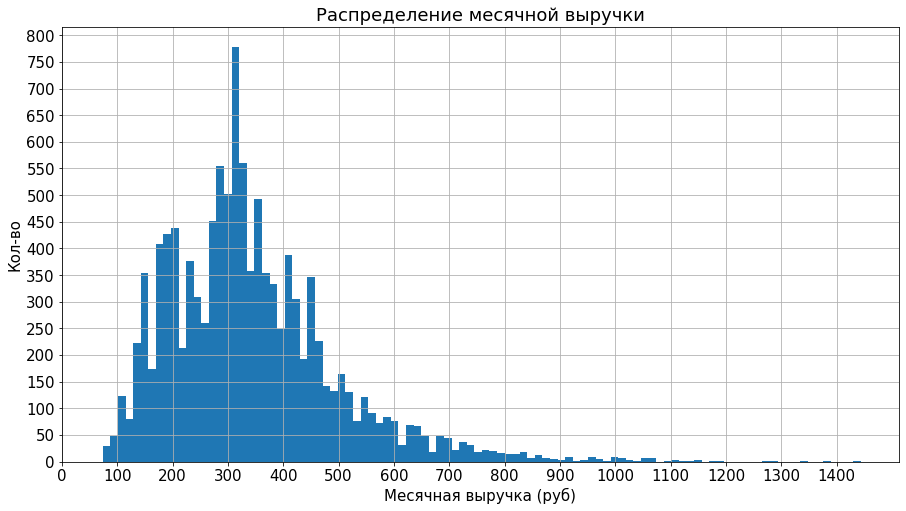

In [90]:
agg_data['income'].hist(bins=100, figsize=(15, 8))
plt.title('Распределение месячной выручки')
plt.xlabel('Месячная выручка (руб)', fontsize=15)
plt.ylabel('Кол-во', fontsize=15)
plt.grid(True)
plt.yticks(range(0, 850, 50))
plt.xticks(range(0, 1500, 100));

In [91]:
round(agg_data.describe()['income'])

count    11300.0
mean       343.0
std        153.0
min         74.0
25%        234.0
50%        319.0
75%        415.0
max       1444.0
Name: income, dtype: float64

Пик находится около 320 руб.
Среднее значение - 343, медиана - 319.
50% значений выручки находится в диапазоне от 234 до 415 руб.

## Шаг 6. Проверка гипотез

### Тратят ли пользователи с подпиской больше времени на поездки

Нулевая гипотеза: выборочное среднее длительности поездки пользователей с подпиской равно выборочному среднему пользователей без подписки.

Альтернативная гипотеза: выборочное среднее длительности поездки пользователей с подпиской больше выборочного среднего пользователей без подписки.

Определим порог статистической значимости на уровне 0,05.

In [92]:
duration_test = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater')

In [93]:
duration_test.pvalue

4.704468074453899e-28

Так как полученное значение меньше порога статистической значимости, есть основания отвергнуть нулевую гипотезу и принять альтернативную гипотезу о том, что пользователи с подпиской тратят больше времени на поездки.

Характеристики распределения длительности поездок клиентов с подпиской

In [94]:
round(data_ultra.describe()['duration'], 1)

count    6500.0
mean       18.5
std         5.6
min         3.8
25%        14.5
50%        18.2
75%        21.9
max        40.8
Name: duration, dtype: float64

Характеристики распределения длительности поездок клиентов без подписки

In [95]:
round(data_free.describe()['duration'], 1)

count    11473.0
mean        17.5
std          6.2
min          2.0
25%         13.1
50%         17.4
75%         21.6
max         34.9
Name: duration, dtype: float64

Среднее выборочное длительности поездки клиентов с подпиской больше среднего выборочного поездок клиентов без подписки - 18.5 против 17.5, и также имеет меньшее стандартное отклонение - 5.6 против 6.2.

Таким образом подтверждается теория о том, что клиенты с подпиской тратят больше времени на поездки.

### Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской, равно 3130

Альтернативная теория: среднее расстояние, которое проезжают пользователи с подпиской, больше 3130

Определим порог статистической значимости на уровне 0,05.

In [96]:
distance_test = st.ttest_1samp(data_ultra['distance'], 3130, alternative='greater')

In [97]:
distance_test.pvalue

0.9195368847849785

Полученное значение больше порога статистической значимости, поэтому нет оснований отвергать нулевую гипотезу. Таким образом среднее расстояние, которое проезжают пользователи с подпиской, составляет не более 3130 м.

Характеристики распределения дальности поездок клиентов с подпиской

In [98]:
round(data_ultra.describe()['distance'], 1)

count    6500.0
mean     3115.4
std       836.9
min       244.2
25%      2785.4
50%      3148.6
75%      3560.6
max      5699.8
Name: distance, dtype: float64

Среднее значение дальности поездок клиентов с подпиской составляет 3115.4 м.

Таким образом подтверждается теория о том, что среднее. расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Нулевая гипотеза: выборочное среднее помесячной выручки от пользователей с подпиской равно выборочному среднему выручки от пользователей без подписки.

Альтернативная теория: выборочное среднее помесячной выручки от пользователей с подпиской больше, чем выборочное среднее выручки от пользователей без подписки.

Определим порог статистической значимости на уровне 0,05.

In [99]:
def add_subscription(user_id, month):
    income_data = data.query('user_id == @user_id and month == @month')
    return income_data['subscription_type'].iloc[0]

In [100]:
agg_data['subscription_type'] = agg_data.apply(
    lambda row: add_subscription(row.name[0], row.name[1]), axis=1
)

In [101]:
round(agg_data.head(10), 1)

total_distance  total_rides  total_duration  income  \
user_id month                                                        
1       1              7027.5            2            41.4   451.0   
        4               754.2            1             6.2   241.0   
        8              6723.5            2            44.8   475.0   
        10             5809.9            2            31.6   391.0   
        11             7003.5            3            53.4   535.0   
        12             6751.6            2            27.2   367.0   
2       3             10187.7            3            61.0   577.0   
        4              6164.4            2            39.0   439.0   
        6              3255.3            1            13.9   283.0   
        7              6780.7            2            46.2   487.0   

              subscription_type  
user_id month                    
1       1                 ultra  
        4                 ultra  
        8                 ultra  
        10                ultra  
        11                ultra  
        12                ultra  
2       3                 ultra  
        4                 ultra  
        6                 ultra  
        7                 ultra

In [102]:
agg_data_ultra = agg_data.query('subscription_type == "ultra"')

In [103]:
agg_data_free = agg_data.query('subscription_type == "free"')

In [104]:
income_test = st.ttest_ind(agg_data_ultra['income'], agg_data_free['income'], alternative='greater')

In [105]:
income_test.pvalue

2.0314113674863288e-30

Полученное значение ниже порога статистической значимости, поэтому нулевую гипотезу о равенстве выборочных средних выручки следует отвергнуть и принять альтернативную гипотезу о том, что пользователи с подпиской приносят больше выручки, чем пользователи без подписки.

Характеристики распределения выручки с клиентов с подпиской

In [106]:
round(agg_data.query('subscription_type == "ultra"').describe()['income'], 1)

count    4533.0
mean      362.8
std        88.3
min       223.0
25%       301.0
50%       337.0
75%       409.0
max       955.0
Name: income, dtype: float64

Характеристики распределения выручки с клиентов без подписки

In [107]:
round(agg_data.query('subscription_type == "free"').describe()['income'], 1)

count    6767.0
mean      329.3
std       183.3
min        74.0
25%       194.0
50%       274.0
75%       428.0
max      1444.0
Name: income, dtype: float64

Средняя выручка с клиентов с подпиской выше, чем с клиентов без подписки - 362.8 против 329.3, и распределена с меньшим стандартным отклонением - 88.3 против 183.3.

Таким оброазом, подтверждается теория о том, что пользователи с подпиской приносят больше выручки, чем пользователи без подписки.

###  Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для проверки подобной гипотезы потребуется выполнить тест для зависимых парных выборок.

scipy.stats.ttest_rel()

## Шаг 7. Распределения

### Нужно провести акцию с раздачей промокодов

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Т. к. цель стоит выполнить план в 100 подписок, то при вроятности 0.1 нужно раздать минимум 1000 промокодов.

In [108]:
n = 1000
p = 0.1
k = 100

Расчитаем вероятность выполнить план при исхоных данных.

In [109]:
prob = st.binom.cdf(k, n, p, loc=0)

In [110]:
round(prob, 3)

0.527

Вероятность получить 100 и менее подписок - 53%.
Запустим цикл, который будет прибавлять по 10 промокодов до тех пор, пока вероятность получить 100 и менее подписок не станет в пределах 5%.

In [111]:
while prob > 0.05:
    prob = st.binom.cdf(k, n, p)
    n += 10

In [112]:
n

1190

In [113]:
round(prob, 3)

0.042

Таким образом, для того, чтобы вероятность выполнить план была в пределах 5% необходимо раздать 1190 промокодов.

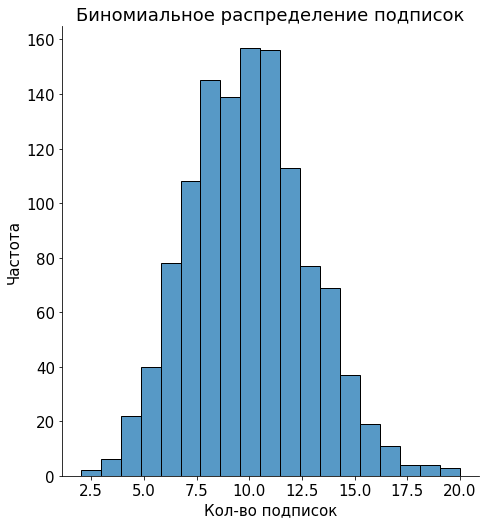

In [114]:
sns.displot(st.binom.rvs(k, p, size=n), bins=19, height=7, aspect=1)
plt.title('Биномиальное распределение подписок')
plt.xlabel('Кол-во подписок')
plt.ylabel('Частота');

### Отдел маркетинга рассылает клиентам push-уведомления

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [115]:
prob_not = st.binom.cdf(399500, 1000000, 0.4)

In [116]:
round(prob_not, 3)

0.154

Вероятность того, что уведомление откроют не более 339,5 тыс. пользователей составляет 15.4%.

In [117]:
n = 1000000
p = 0.4

In [118]:
m = n * p

In [119]:
se = (n * p * (1 - p))**0.5

In [120]:
left = int(m - 4 *se)

In [121]:
right = int(m + 4 *se)

In [122]:
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result

In [123]:
x = linspace(left, right, 100)

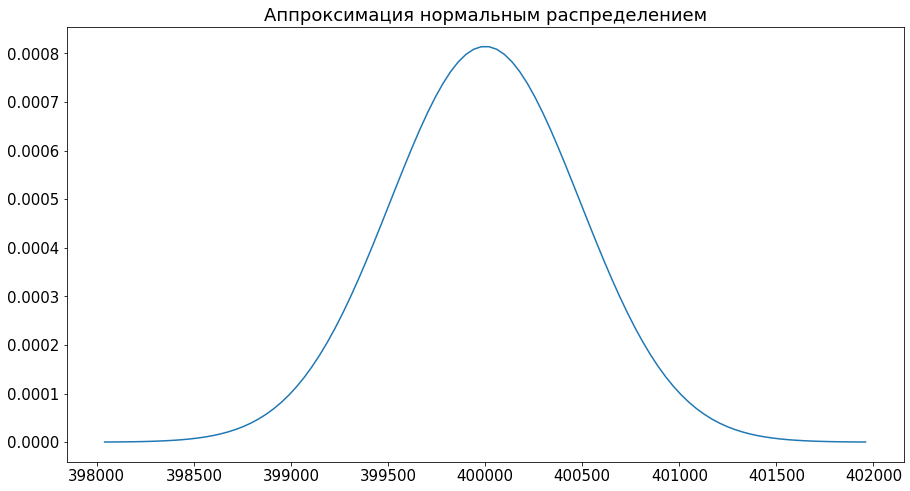

In [124]:
plt.figure(figsize=(15,8))
plt.plot(x, st.norm.pdf(x, m, se))
plt.title('Аппроксимация нормальным распределением');

## Общий вывод

В данной работе была проведена работа по анализу данных сервиса по аренде самокатов.

Стояла задача проверить гипотезы продакт-менеджеров и выполнить расчеты для отдела маркетинга.

На этапе предобработки данных было сделано следующее:
- приведен столбец `date` в `rides` к типу даты
- создан новый столбец с номером месяца в `rides`
- удалены дубликаты в датафрейме `users` в количестве 31
- удалены записи с длительностью поездки менее минуты. Разработчикам надо внимательно изучить эти случаи т.к. дистанции на данных поездках были большие и происходит потеря выручки.

Был проведен исследовательский анализ данных.

Частота встречаемости городов.

Больше всего клентов зафиксировано в городе Пятигорске - 219, на втором месте город Екатеринбург - 204 клиента. В остальных городах количество менее 200. Минимльное количчество клиентов в Москве - 168.

Соотношение клиентов с подпиской и без подписки.

54% клиентов пользуются сервисом без подписки, 46% - с подпиской. У компании есть большой потенциал по увеличению доли клиентов с подпиской.

Возраст пользователей.

Прокатом самокатов пользуются в основном молодые люди до 30 лет.
Возраст клиентов сервиса от 12 до 43 лет. 50% пользователей в возрасте от 22 до 28 лет. Больше всего пользователей в возрасте 25 лет.

Дальность поездки.

Основная масса поездок совершается на расстояние около 3 км. Среднее значение - 3071, медиана - 3134. 50% поездок находятся в диапазоне от 2543 до 3776. Поездки менее 200 м и более 5500 крайне редки. Присутствует локальный максимум около значения 700 м, возможно это поездки до ближайшей остановки общественного транспорта от дома и обратно.

Продолжительность поездки.

50% данных находятся в диапазоне от 13.7 до 21.7 минут. Среднее значение и медиана находятся около 18 минут.
Значения менее 4 и более 33 минут встречаются редко.

На следующем этапе было осуществлено объединение данных.

Создан датафрейм объединяющий информацию о клиентах, поездках и тарифах. Затем из него выделены два датафрейма с пользователями с подпиской и с пользователями без подписки.

Проанализированы длительности и дальности поездок клиентов с подпиской и без нее.

Распределение поездок без подписки по дистанции схоже с распределением всех поездок. Пик смещен ближе к значению 2500 м. Также присутствует локальный пик около 700 м.

Среднее значение - 3028, медиана - 3102. 50% поездок находятся в диапазоне от 2361 до 3884 м.

Поездки с подпиской по расстоянию распределены с меньшим стандартным отклонением по сравнению с поездками без подписки - 837 против 1236. Данные более плотно сгруппированы около 3000 м с пиком около 3200 м. Один локальный пик смещен ближе к 1000 м, также присутствует локальный пик около 4000 м.

Среднее значение - 3115 м., медиана - 3149 м.
50% поездок находятся в диапазоне от 2785 до 3561 м.

Длительность поездок обоих групп схожа. 50% данных находятся в диапазоне от 13 до 22 минут.

Были создан датафрейм с агрегированные данными о поездках по месяцам по каждому клиенту и расчитана выручка.

Пик находится около 320 руб.
Среднее значение - 343, медиана - 319.
50% значений выручки находится в диапазоне от 234 до 415 руб.

Были проверены следующие гипотезы:
- Тратят ли пользователи с подпиской больше времени на поездки. Результаты подтвердили эту гипотезу.
- Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. Оснований отвергнуть данную теорию не было.
- Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Данная гипотеза была принята.

Были расчитаны данные для промоакций.

Для того, чтобы вероятность выполнить план была в пределах 5% необходимо раздать 1190 промокодов.

Вероятность того, что уведомление откроют не более 339,5 тыс. пользователей составляет 15.4%.